Question 1) Delivery_time -> Predict delivery time using sorting time Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<Axes: xlabel='Delivery Time', ylabel='Density'>

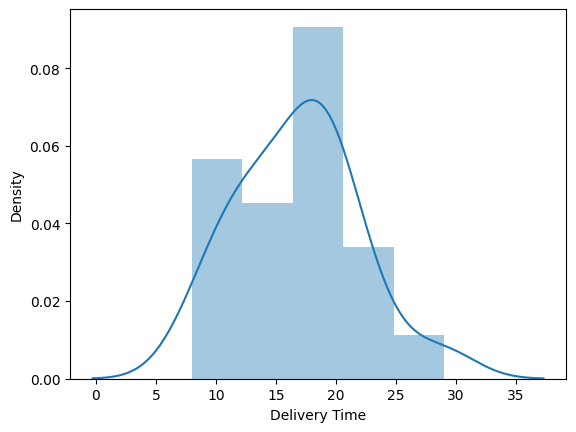

In [ ]:
sns.distplot(df['Delivery Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

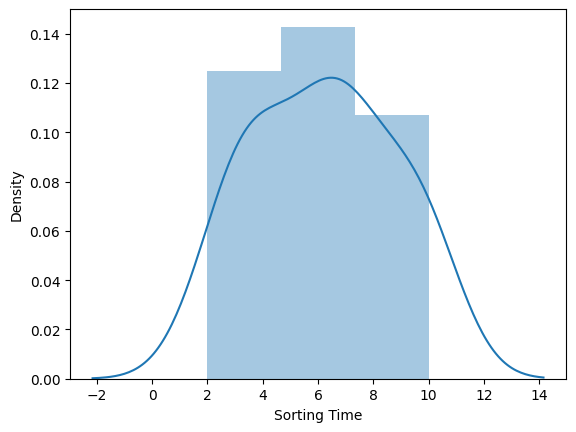

In [ ]:
sns.distplot(df['Sorting Time'])

In [ ]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
df.corr()


,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


Model Predicitions

                             OLS Regression Results                            
Dep. Variable:     df['delivery_time']   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.666
Method:                  Least Squares   F-statistic:                     40.80
Date:                 Wed, 31 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                         12:12:25   Log-Likelihood:                -51.357
No. Observations:                   21   AIC:                             106.7
Df Residuals:                       19   BIC:                             108.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5

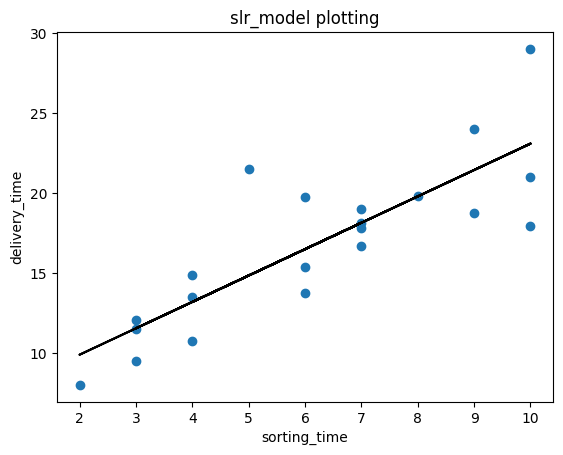

In [ ]:
slr_model=smf.ols("df['delivery_time']~df['sorting_time']",data=df).fit()
print(slr_model.summary())
predict=slr_model.predict(df.iloc[:,1])
import matplotlib.pylab as plt
plt.scatter(x=df['sorting_time'],y=df['delivery_time'])
plt.plot(df['sorting_time'],predict,color='black')
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.title("slr_model plotting")
plt.show()

Log Model

                             OLS Regression Results                            
Dep. Variable:     df['delivery_time']   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Wed, 31 Jan 2024   Prob (F-statistic):           2.64e-06
Time:                         12:12:30   Log-Likelihood:                -50.912
No. Observations:                   21   AIC:                             105.8
Df Residuals:                       19   BIC:                             107.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept 

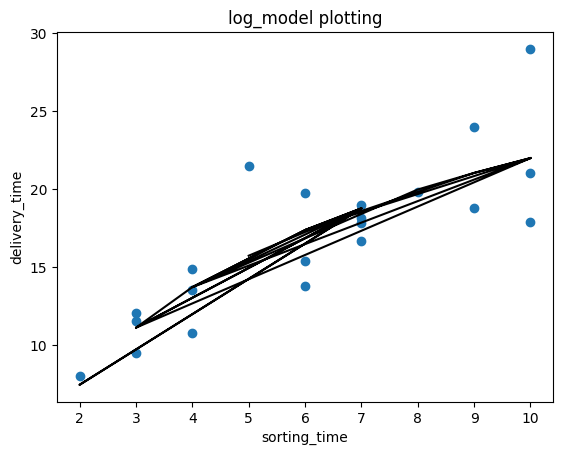

In [ ]:
log_model=smf.ols("df['delivery_time']~np.log(df['sorting_time'])",data=df).fit()
print(log_model.summary())
log_predict=log_model.predict(pd.DataFrame(df['sorting_time']))

import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(x=df['sorting_time'],y=df['delivery_time'])
plt.plot(df['sorting_time'],log_predict,color='black')
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.title("log_model plotting")
plt.show()


Exponential Model

                                 OLS Regression Results                                
Dep. Variable:     np.log(df['delivery_time'])   R-squared:                       0.711
Model:                                     OLS   Adj. R-squared:                  0.696
Method:                          Least Squares   F-statistic:                     46.73
Date:                         Wed, 31 Jan 2024   Prob (F-statistic):           1.59e-06
Time:                                 12:12:43   Log-Likelihood:                 7.7920
No. Observations:                           21   AIC:                            -11.58
Df Residuals:                               19   BIC:                            -9.495
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

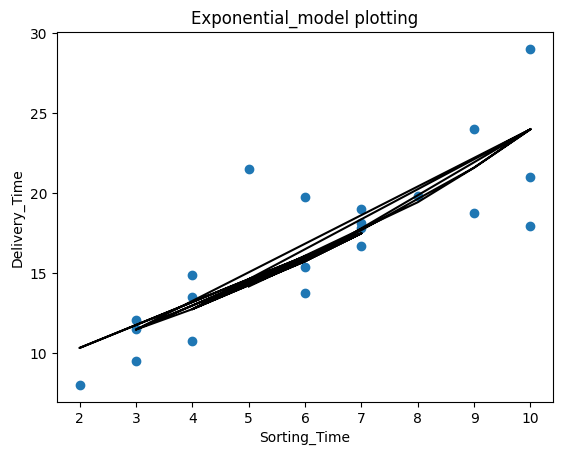

In [ ]:
exp_model=smf.ols("np.log(df['delivery_time'])~(df['sorting_time'])",data=df).fit()
print(exp_model.summary())
predict_exp=exp_model.predict(pd.DataFrame(df['sorting_time']))
pred_exp=np.exp(predict_exp)

import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(x=df['sorting_time'],y=df['delivery_time'])
plt.plot(df['sorting_time'],np.exp(predict_exp),color='black')
plt.title("Exponential_model plotting")
plt.xlabel("Sorting_Time")
plt.ylabel("Delivery_Time")
plt.show()


In [ ]:
simple_regression=linear_model.LinearRegression()
simple_regression.fit(df[['sorting_time']],df.delivery_time)

print("Coefficent M: ",simple_regression.coef_)
print("intercept 'B': ",simple_regression.intercept_)

while True:
    try:
        myinput=int(input("sorting_time: "))
        myoutput=simple_regression.predict([[myinput]])
        print("delivery_time: ",myoutput)
    except KeyboardInterrupt:
        print("\nExiting program...")
        break

Coefficent M:  [1.6490199]
intercept 'B':  6.58273397199706

Exiting program...


RMSE

In [ ]:
np.sqrt(np.mean((df.delivery_time-predict)**2))

2.7916503270617654

In [ ]:
np.sqrt(np.mean((df.delivery_time-predict_exp)**2))

14.795516941016684

In [ ]:
np.sqrt(np.mean((df.delivery_time-log_predict)**2))

2.733171476682066